In [145]:
import numpy as np
import pandas as pd
import collections

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

import pprint
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing

In [146]:
# トレーニングデータ、テストデータ、サンプルサブミットデータを読み込み
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [147]:
# ステージデータ、武器データを読み込み
stage_info = pd.read_csv('stage_info.csv')
weapon_info = pd.read_csv('statink-weapon2.csv')

In [148]:
# 仮のデータ置き場を作る
data = np.zeros((66125,1))
data = pd.DataFrame(data)

In [149]:
# A4-level, B3-level, B4-level のNanを0に置換
train['A4-level'].fillna(0, inplace=True)
train['B3-level'].fillna(0, inplace=True)
train['B4-level'].fillna(0, inplace=True)   

In [150]:
# rankは順序尺度なのでサイズマッピングする
rank_mapping = {'c-': 1, 'c': 2, 'c+': 3, 'b-': 4, 'b': 5, 'b+': 6, 'a-': 7, 'a': 8, 'a+': 9, 's-':10, 's':11, 's+':12, 'x':13}
data['A1-rank'] = train['A1-rank'].map(rank_mapping)
data['A2-rank'] = train['A2-rank'].map(rank_mapping)
data['A3-rank'] = train['A3-rank'].map(rank_mapping)
data['A4-rank'] = train['A4-rank'].map(rank_mapping)
data['B1-rank'] = train['B1-rank'].map(rank_mapping)
data['B2-rank'] = train['B2-rank'].map(rank_mapping)
data['B3-rank'] = train['B3-rank'].map(rank_mapping)
data['B4-rank'] = train['B4-rank'].map(rank_mapping)

# 欠損値は0にする
data['A1-rank'].fillna(0, inplace=True)
data['A2-rank'].fillna(0, inplace=True)
data['A3-rank'].fillna(0, inplace=True)
data['A4-rank'].fillna(0, inplace=True)
data['B1-rank'].fillna(0, inplace=True)
data['B2-rank'].fillna(0, inplace=True)
data['B3-rank'].fillna(0, inplace=True)
data['B4-rank'].fillna(0, inplace=True)

In [151]:
##### チーム人数の差の変数を作る #####

# A4-level, B3-level, B4-level のNanを0に置換
train['A4-level'].fillna(0, inplace=True)
train['B3-level'].fillna(0, inplace=True)
train['B4-level'].fillna(0, inplace=True)   
# ランクにemptyがあるかどうか真偽値を与える
train_bool_A4 = (train['A4-level'] == 0)
train_bool_B3 = (train['B3-level'] == 0)
train_bool_B4 = (train['B4-level'] == 0)

team_dif = np.zeros((66125,1))
for i in range(66124):
    team_A = 4 - train_bool_A4[i] 
    team_B = 4 - (train_bool_B3[i] + train_bool_B4[i])
    team_dif[i,0] = team_A - team_B
    
team_dif = pd.DataFrame(team_dif)
# trainに結合
train['team_dif'] = team_dif

In [152]:
##### sub列とspecial列を作ってtrainに結合する #####

# 武器の辞書を作成
dic = weapon_info.set_index('key')['special'].to_dict()

# trainにspecial列を追加
data['A1-special'] = 0
data['A2-special'] = 0
data['A3-special'] = 0
data['A4-special'] = 0
data['B1-special'] = 0
data['B2-special'] = 0
data['B3-special'] = 0
data['B4-special'] = 0

# special列に代入
data['A1-special'] = train['A1-weapon'].replace(dic)
data['A2-special'] = train['A2-weapon'].replace(dic)
data['A3-special'] = train['A3-weapon'].replace(dic)
data['A4-special'] = train['A4-weapon'].replace(dic)
data['B1-special'] = train['B1-weapon'].replace(dic)
data['B2-special'] = train['B2-weapon'].replace(dic)
data['B3-special'] = train['B3-weapon'].replace(dic)
data['B4-special'] = train['B4-weapon'].replace(dic)

# trainにsub列を追加
data['A1-sub'] = 0
data['A2-sub'] = 0
data['A3-sub'] = 0
data['A4-sub'] = 0
data['B1-sub'] = 0
data['B2-sub'] = 0
data['B3-sub'] = 0
data['B4-sub'] = 0

# 武器の辞書を作成
dic = weapon_info.set_index('key')['subweapon'].to_dict()

# sub列に代入
data['A1-sub'] = train['A1-weapon'].replace(dic)
data['A2-sub'] = train['A2-weapon'].replace(dic)
data['A3-sub'] = train['A3-weapon'].replace(dic)
data['A4-sub'] = train['A4-weapon'].replace(dic)
data['B1-sub'] = train['B1-weapon'].replace(dic)
data['B2-sub'] = train['B2-weapon'].replace(dic)
data['B3-sub'] = train['B3-weapon'].replace(dic)
data['B4-sub'] = train['B4-weapon'].replace(dic)

In [153]:
# カテゴリーの列を作って結合する
dic = weapon_info.set_index('key')['category2'].to_dict()
data['A1-category'] = train['A1-weapon'].replace(dic)
data['A2-category'] = train['A2-weapon'].replace(dic)
data['A3-category'] = train['A3-weapon'].replace(dic)
data['A4-category'] = train['A4-weapon'].replace(dic)
data['B1-category'] = train['B1-weapon'].replace(dic)
data['B2-category'] = train['B2-weapon'].replace(dic)
data['B3-category'] = train['B3-weapon'].replace(dic)
data['B4-category'] = train['B4-weapon'].replace(dic)

In [154]:
##### アーマーがいるかいないかの変数を作る #####

# aromr がいるかどうか真偽値を与える
data_bool_A1special = (data['A1-special'] == 'armor')
data_bool_A2special = (data['A2-special'] == 'armor')
data_bool_A3special = (data['A3-special'] == 'armor')
data_bool_A4special = (data['A4-special'] == 'armor')
data_bool_B1special = (data['B1-special'] == 'armor')
data_bool_B2special = (data['B2-special'] == 'armor')
data_bool_B3special = (data['B3-special'] == 'armor')
data_bool_B4special = (data['B4-special'] == 'armor')

armor_A = np.zeros((66125,1))
armor_B = np.zeros((66125,1))
for i in range(66124): 
    armor_A[i] = max(train_bool_A1special[i], train_bool_A2special[i], train_bool_A3special[i], train_bool_A4special[i])
    armor_B[i] = max(train_bool_B1special[i], train_bool_B2special[i], train_bool_B3special[i], train_bool_B4special[i])
    
# pandas に変換して trainに結合
armor_A = pd.DataFrame(armor_A)
armor_B = pd.DataFrame(armor_B)
train['armor_A'] = armor_A
train['armor_B'] = armor_B

In [155]:
##### チャージャーの人数の変数を作る #####

# charger がいるかどうか真偽値を与える
data_bool_A1_charger = (data['A1-category'] == 'charger')
data_bool_A2_charger = (data['A2-category'] == 'charger')
data_bool_A3_charger = (data['A3-category'] == 'charger')
data_bool_A4_charger = (data['A4-category'] == 'charger')
data_bool_B1_charger = (data['B1-category'] == 'charger')
data_bool_B2_charger = (data['B2-category'] == 'charger')
data_bool_B3_charger = (data['B3-category'] == 'charger')
data_bool_B4_charger = (data['B4-category'] == 'charger')

charger_A = np.zeros((66125,1))
charger_B = np.zeros((66125,1))
for i in range(66124): 
    charger_A[i] = data_bool_A1_charger[i] + data_bool_A2_charger[i] + data_bool_A3_charger[i] + data_bool_A4_charger[i]
    charger_B[i] = data_bool_B1_charger[i] + data_bool_B2_charger[i] + data_bool_B3_charger[i] + data_bool_B4_charger[i]
    
# pandas に変換して trainに結合
charger_A = pd.DataFrame(charger_A)
charger_B = pd.DataFrame(charger_B)
train['charger_A'] = charger_A
train['charger_B'] = charger_B

In [156]:
##### ガチマはrank ナワバリはlevel だけ使う ##### 
A1_level_rank = np.zeros((66125,1))
A2_level_rank = np.zeros((66125,1))
A3_level_rank = np.zeros((66125,1))
A4_level_rank = np.zeros((66125,1))
B1_level_rank = np.zeros((66125,1))
B2_level_rank = np.zeros((66125,1))
B3_level_rank = np.zeros((66125,1))
B4_level_rank = np.zeros((66125,1))

for  i in range(66124): 
    if train['mode'][i] == 'nawabari':
        A1_level_rank[i] = train['A1-level'][i]
        A2_level_rank[i] = train['A2-level'][i]
        A3_level_rank[i] = train['A3-level'][i]
        A4_level_rank[i] = train['A4-level'][i]
        B1_level_rank[i] = train['B1-level'][i]
        B2_level_rank[i] = train['B2-level'][i]
        B3_level_rank[i] = train['B3-level'][i]
        B4_level_rank[i] = train['B4-level'][i]
    else:
        A1_level_rank[i] = data['A1-rank'][i]
        A2_level_rank[i] = data['A2-rank'][i]
        A3_level_rank[i] = data['A3-rank'][i]
        A4_level_rank[i] = data['A4-rank'][i]
        B1_level_rank[i] = data['B1-rank'][i]
        B2_level_rank[i] = data['B2-rank'][i]
        B3_level_rank[i] = data['B3-rank'][i]
        B4_level_rank[i] = data['B4-rank'][i]

In [157]:
##### ランク（ウデマエ）の差の変数を作る #####
rank_dif = (A1_level_rank + A2_level_rank + A3_level_rank + A4_level_rank) - (B1_level_rank + B2_level_rank + B3_level_rank + B4_level_rank) 
# pandas に変換して trainに結合
rank_dif = pd.DataFrame(rank_dif)
train['rank_dif'] = rank_dif

In [158]:
# Label Encording
le = preprocessing.LabelEncoder()
for column in ['game-ver','mode','stage']:
#     print(titanic[column].shape)
    le = preprocessing.LabelEncoder()
    le.fit(train[column])
    train[column] = le.transform(train[column])

In [159]:
# 不要な列を削除
train.drop(['id','period','lobby','lobby-mode','A1-level','A2-level','A3-level','A4-level','B1-level','B2-level','B3-level','B4-level','A1-rank','A2-rank','A3-rank','A4-rank','B1-rank','B2-rank','B3-rank','B4-rank','A1-weapon','A2-weapon','A3-weapon','A4-weapon','B1-weapon','B2-weapon','B3-weapon','B4-weapon'], axis='columns', inplace=True)

In [161]:
X_train = train.drop(['y'], axis=1) # X_trainはtrainのSurvived列以外
y_train = train['y'] # y_trainはtrainのSurvived列

In [171]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# X_trainとy_trainをtrainとvalidに分割
train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train,
test_size=0.33, random_state=0)
# lgb.Datasetでtrainとvalidを作っておく
lgb_train = lgb.Dataset(train_x, train_y)
lgb_eval = lgb.Dataset(valid_x, valid_y)
# パラメータを定義
lgbm_params = {'objective': 'binary'}
# lgb.trainで学習
evals_result = {}
gbm = lgb.train(params=lgbm_params,
    train_set=lgb_train,
    valid_sets=[lgb_train, lgb_eval],
    early_stopping_rounds=20,
    evals_result=evals_result,
    verbose_eval=10);

Training until validation scores don't improve for 10 rounds
[10]	training's binary_logloss: 0.683794	valid_1's binary_logloss: 0.686081
[20]	training's binary_logloss: 0.681085	valid_1's binary_logloss: 0.685303
[30]	training's binary_logloss: 0.67903	valid_1's binary_logloss: 0.685367
Early stopping, best iteration is:
[25]	training's binary_logloss: 0.67999	valid_1's binary_logloss: 0.68525


In [172]:
oof = (gbm.predict(valid_x) > 0.5).astype(int)
print('score', round(accuracy_score(valid_y, oof)*100, 2))

score 54.39


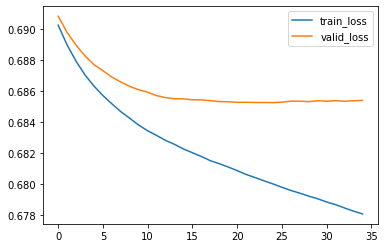

In [174]:
import matplotlib.pyplot as plt

plt.plot(evals_result['training']['binary_logloss'], label='train_loss')
plt.plot(evals_result['valid_1']['binary_logloss'], label='valid_loss')
plt.legend()

In [175]:
res = train.corr()
print(res)

           game-ver      mode     stage         y  team_dif   armor_A  \
game-ver        NaN       NaN       NaN       NaN       NaN       NaN   
mode            NaN  1.000000  0.012422  0.007298 -0.002575 -0.053744   
stage           NaN  0.012422  1.000000 -0.000097  0.001322  0.001341   
y               NaN  0.007298 -0.000097  1.000000  0.031074  0.012232   
team_dif        NaN -0.002575  0.001322  0.031074  1.000000  0.003865   
armor_A         NaN -0.053744  0.001341  0.012232  0.003865  1.000000   
armor_B         NaN -0.057933  0.004865 -0.014956 -0.006992  0.071076   
charger_A       NaN  0.050962 -0.002428 -0.043258  0.002796 -0.064140   
charger_B       NaN  0.047073  0.005949  0.048625  0.002347 -0.014306   
rank_dif        NaN  0.068676 -0.003201  0.076663  0.005682 -0.017578   

            armor_B  charger_A  charger_B  rank_dif  
game-ver        NaN        NaN        NaN       NaN  
mode      -0.057933   0.050962   0.047073  0.068676  
stage      0.004865  -0.002428   0

In [164]:
train.head()

,game-ver,mode,stage,y,team_dif,armor_A,armor_B,charger_A,charger_B,rank_dif
0,0,3,20,1,0.0,0.0,0.0,1.0,1.0,127.0
1,0,3,3,0,0.0,1.0,0.0,0.0,1.0,76.0
2,0,2,1,0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,3,8,0,0.0,1.0,0.0,1.0,1.0,-350.0
4,0,2,6,1,0.0,1.0,1.0,0.0,0.0,0.0
